In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('Data/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
# get x and y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [23]:
# get mean from x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# number of values
n = len(X)

# to calculate regression line we need formula y=mx+c
# now we will calculate m and c
# y and x are equals to mean_x and mean_y

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
m = numer / denom
c = mean_y - (m * mean_x)

print('m = ', m, " c = ", c)

m =  0.26342933948939945  c =  325.57342104944223


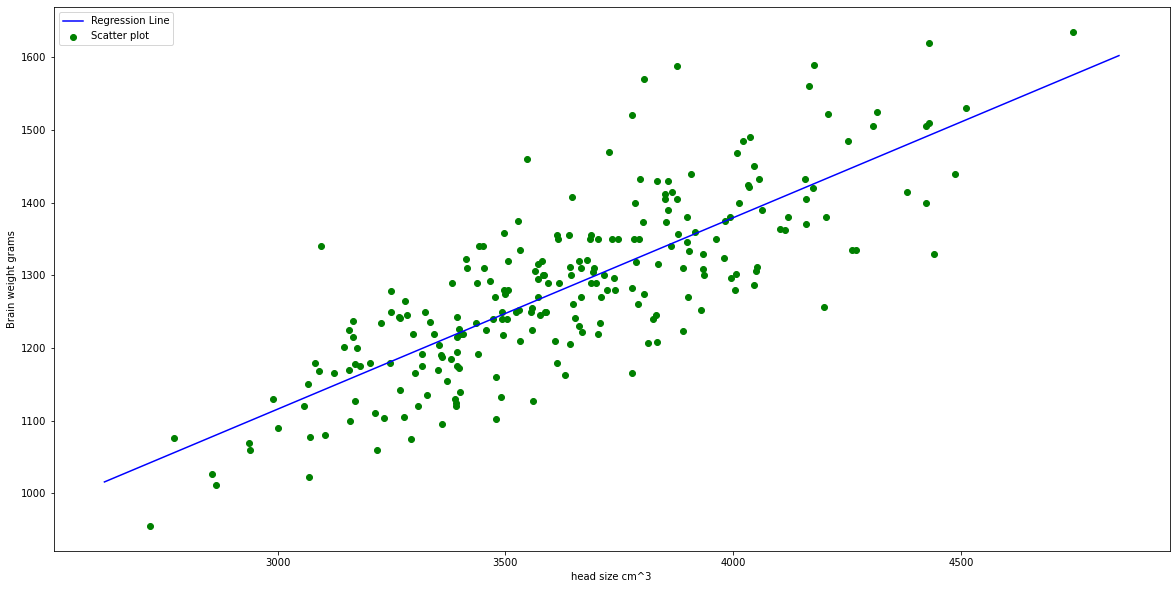

In [24]:
# see the result
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = m * x + c

#ploting line
plt.plot(x, y, color="blue", label="Regression Line")

# scatter points
plt.scatter(X, Y, c='green', label="Scatter plot")

plt.xlabel("head size cm^3")
plt.ylabel("Brain weight grams")
plt.legend()
plt.show()

In [25]:
# r^2 formula
t_ss = 0
r_ss = 0
for i in range(n):
    y_pred = m * X[i] + c
    t_ss += (Y[i] - mean_y) ** 2
    r_ss += (Y[i] - y_pred) ** 2
r2 = 1 - (r_ss/t_ss)
print(r2)

0.6393117199570003


In [29]:
# now check linear regression from sklearn library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = X.reshape((n, 1))

# model
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)

# and check the r^2 score
r2_score = reg.score(X,Y)

print(r2_score)  # it is this same as r2 from linear regression I made from scratch


0.639311719957
